Dataset loaded successfully.
Initial dataset shape: (1718, 80)
Dataset shape after cleaning: (1718, 80)
Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


C:\Users\jaya karthick\AppData\Local\Temp\ipykernel_24344\2888615337.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # Forward fill missing values
C:\Users\jaya karthick\AppData\Local\Temp\ipykernel_24344\2888615337.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='bfill')  # Backward fill for remaining missing values


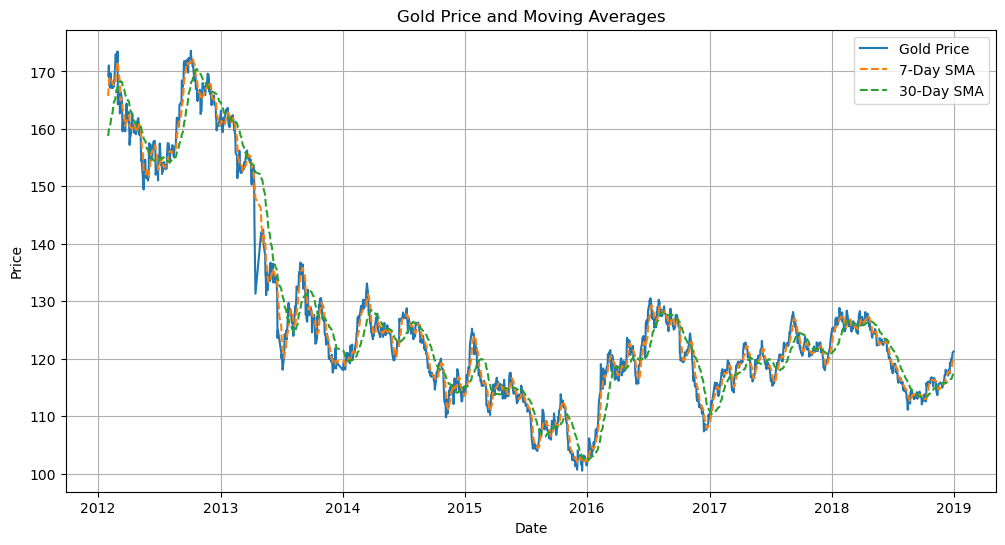

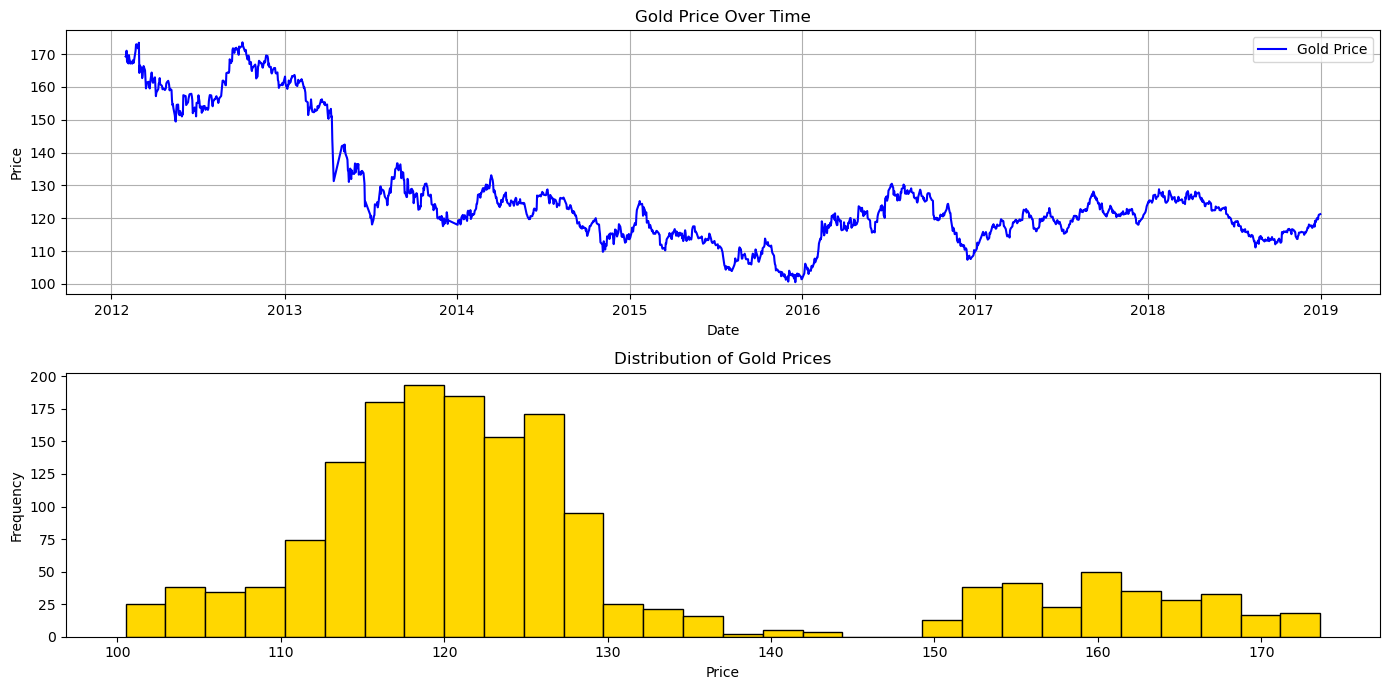

Checking stationarity of the time series...
ADF Statistic: -2.4912282675214468
p-value: 0.11762319598769361
Critical Values:
   1%: -3.4342322039823197
   5%: -2.863254774066211
   10%: -2.5676829016514233
The time series is not stationary (p-value > 0.05). Consider differencing or other transformations.
Processed dataset preview:
                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-31  169.770004  169.860001  167.720001  169.309998  169.309998   
2012-02-01  169.750000  170.179993  169.080002  169.559998  169.559998   
2012-02-02  169.960007  171.229996  169.679993  171.050003  171.050003   
2012-02-03  169.880005  170.139999  167.509995  167.639999  167.639999   
2012-02-06  166.960007  167.679993  166.610001  167.179993  167.179993   

              Volume     SP_open     SP_high      SP_low    SP_close  ...  \
Date                                                                  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load dataset
def load_data(filepath):
    try:
        data = pd.read_csv(filepath, parse_dates=True, index_col='Date')
        print("Dataset loaded successfully.")
        return data
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None

# Data Cleaning
def clean_data(data):
    print("Initial dataset shape:", data.shape)
    
    # Drop duplicates
    data = data.drop_duplicates()

    # Handle missing values
    data = data.fillna(method='ffill')  # Forward fill missing values
    data = data.fillna(method='bfill')  # Backward fill for remaining missing values

    # Filter out any rows with invalid data
    data = data.dropna()

    print("Dataset shape after cleaning:", data.shape)
    return data

# Handle time series data
def preprocess_time_series(data):
    print("Index type:", type(data.index))
    
    # Ensure the index is datetime for time series processing
    if not isinstance(data.index, pd.DatetimeIndex):
        data.index = pd.to_datetime(data.index)

    # Sort the data by datetime (just in case it's not sorted)
    data = data.sort_index()

    return data

# Feature Engineering
def feature_engineering(data):
    data['SMA_7'] = data['Close'].rolling(window=7).mean()  # 7-day Simple Moving Average
    data['SMA_30'] = data['Close'].rolling(window=30).mean()  # 30-day Simple Moving Average

    # Add lag features for prediction
    data['Lag_1'] = data['Close'].shift(1)  # Previous day's price
    data['Lag_7'] = data['Close'].shift(7)  # Price a week ago

    # Drop NaN rows generated by lagging or rolling
    data = data.dropna()

    return data

# Data Visualization
def visualize_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Gold Price')
    plt.plot(data['SMA_7'], label='7-Day SMA', linestyle='--')
    plt.plot(data['SMA_30'], label='30-Day SMA', linestyle='--')
    plt.title('Gold Price and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

# Advanced Visualization
def visualize_time_series(data):
    plt.figure(figsize=(14, 7))

    # Line plot of the close price
    plt.subplot(2, 1, 1)
    plt.plot(data['Close'], label='Gold Price', color='blue')
    plt.title('Gold Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()

    # Histogram of price distribution
    plt.subplot(2, 1, 2)
    plt.hist(data['Close'], bins=30, color='gold', edgecolor='black')
    plt.title('Distribution of Gold Prices')
    plt.xlabel('Price')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Check stationarity of time series
def check_stationarity(data):
    print("Checking stationarity of the time series...")
    result = adfuller(data['Close'])
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")

    if result[1] <= 0.05:
        print("The time series is stationary (p-value <= 0.05).")
    else:
        print("The time series is not stationary (p-value > 0.05). Consider differencing or other transformations.")

# Main function
def main():
    filepath = "C:\\Users\\jaya karthick\\Downloads\\archive (1) (1)\\FINAL_USO.csv"

    # Step 1: Load data
    data = load_data(filepath)
    if data is None:
        return

    # Step 2: Data Cleaning
    data = clean_data(data)

    # Step 3: Time Series Preprocessing
    data = preprocess_time_series(data)

    # Step 4: Feature Engineering
    data = feature_engineering(data)

    # Step 5: Data Visualization
    visualize_data(data)
    visualize_time_series(data)

    # Step 6: Check Stationarity
    check_stationarity(data)

    print("Processed dataset preview:\n", data.head())

if __name__ == "__main__":
    main()
